In [1]:
import cvxpy
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from cvxopt import matrix
from cvxopt.modeling import variable, sum

In [4]:
n = 10
m = 10

In [5]:
X = np.random.rand(n, 2)

In [6]:
Y = np.random.rand(m, 2)

In [7]:
for i in range(n):
    X[i][0] += 0.3
    Y[i][0] -= 0.3

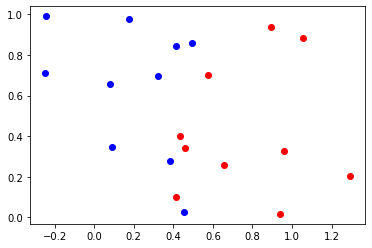

In [8]:
plt.scatter(X[:,0], X[:,1], c='red')
plt.scatter(Y[:,0], Y[:,1], c='blue')

In [9]:
A = cvxpy.Variable(2)
b = cvxpy.Variable(1)
U = cvxpy.Variable(n)
V = cvxpy.Variable(m)

In [10]:
objective = cvxpy.Minimize(cvxpy.sum(U) + cvxpy.sum(V))

In [11]:
constraints = []

In [12]:
for i in range(n):
    constraints += [A @ X[i] - b >= 1 - U[i]]
    constraints += [U[i] >= 0]

In [13]:
for j in range(m):
    constraints += [A @ Y[j] - b <= -1 + V[j]]
    constraints += [V[j] >= 0]

In [14]:
prob = cvxpy.Problem(objective, constraints)
prob.solve()

4.888440039477107

In [15]:
print('Target function value: ', round(prob.value, 4))
print('A:', round(A.value[0], 4), round(A.value[1], 4))
print('b:', round(b.value[0], 4))
print('U: ', '  '.join([f'{round((el), 2):>1.2f}' for el in U.value]))
print('V: ', '  '.join([f'{round((el), 2):>1.2f}' for el in V.value]))

Target function value:  4.8884
A: 31.6526 -5.9564
b: 11.4723
U:  1.15  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
V:  0.00  0.00  0.00  0.00  3.68  0.06  0.00  0.00  0.00  0.00


In [22]:
x1, x2, y1, y2 = 0.3, 0.6, (b.value[0] - 0.3*A.value[0]) / A.value[1], (b.value[0] - 0.6*A.value[0]) / A.value[1]

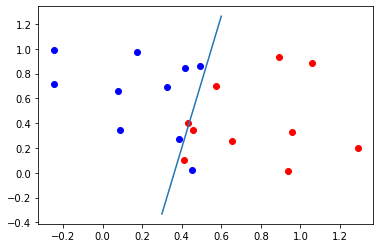

In [23]:
plt.scatter(X[:,0], X[:,1], c='red')
plt.scatter(Y[:,0], Y[:,1], c='blue')
plt.plot([x1, x2], [y1, y2], label='f(x) = Ax - b')